# STA 220 Assignment 3

Due __Februrary 23, 2024__ by __11:59pm__. Submit your work by uploading it to Gradescope through Canvas.

Instructions:

1. Provide your solutions in new cells following each exercise description. Create as many new cells as necessary. Use code cells for your Python scripts and Markdown cells for explanatory text or answers to non-coding questions. Answer all textual questions in complete sentences.
2. The use of assistive tools is permitted, but must be indicated. You will be graded on you proficiency in coding. Produce high quality code by adhering to proper programming principles. 
3. Export the .jpynb as .pdf and submit it on Gradescope in time. To facilitate grading, indicate the area of the solution on the submission. Submissions without indication will be marked down. No late submissions accepted. 
4. If test cases are given, your solution must be in the same format. 
5. The total number of points is 10. 

__(a, i)__ Write a function that retrieves all links to movies in the database by scraping the _alphabetical_ section on [imsdb.com](https://imsdb.com/) and retrieve the links. _How many links did you find?_ __(ii)__ Write a function `fetch_script` that, given the link of a movie retrieved in (i), returns a dictionary that contains all relevant information of the movie: 

```python
fetch_script('/Movie Scripts/10 Things I Hate About You Script.html')

>>> {'title': '10 Things I Hate About You',
     'writers': ['Karen McCullah Lutz', 'Kirsten Smith', 'William Shakespeare'],
     'genres': ['Comedy', 'Romance'],
     'date': 1997,
     'script': '...'}
```

The `script` field contains a string of the scraped script. Retrieve the information for all movies. _How many scripts did you retrieve?_

In [5]:
from bs4 import BeautifulSoup
import requests
import re
import pickle

In [2]:
list_genre = str.split("Action Adventure Animation Comedy Crime Drama Family Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi Short Thriller War Western")
url = "https://imsdb.com/"

def movie_url_extraction(url):
    movie_title_url_list = []
    url_list = []
    response = requests.get(url)
    bs = BeautifulSoup(response.text)
    html_url_list = bs.body.contents[5].find('td').findAll('td')[3:30]
    for i in range(len(html_url_list)):
        url_list.append(url + html_url_list[i].a['href'])
    for i in range(len(url_list)):
        url_1 = url_list[i]
        response = requests.get(url_1).text
        bs = BeautifulSoup(response)
        script_url = bs.findAll('table')[1].findAll('td', {'valign':'top'})[1].findAll('p')
        for i in range(len(script_url)):
            tuple = (script_url[i].find('a').text, url + script_url[i].find('a')['href'])
            movie_title_url_list.append(tuple)
    return movie_title_url_list    

In [3]:
x = movie_url_extraction(url)
len(x)

1221

In [5]:
def fetch_script(url_tuple):
    url_name = url_tuple[1]
    script_dict = {}
    response = requests.get(url_name).text
    bs2 = BeautifulSoup(response)
    script_detail = bs2.find('table', {'class':"script-details"})
    detail = script_detail.findAll('a')
    genre = []
    writer = []
    #TITLE
    script_dict['Title'] = url_tuple[0]
    #DATE EXTRACTION
    SDate = script_detail.find('b', string='Script Date')
    if SDate:
        SDate = SDate.next.next
        SDate = str(SDate)
        SDate = SDate.replace(":", "")
        SDate = SDate.lstrip()
        script_dict['ScriptDate'] = SDate
    else:
        script_dict['ScriptDate'] = None

    mrdate = script_detail.find('b', string='Movie Release Date')
    if mrdate:
        mrdate = mrdate.next.next
        mrdate = str(mrdate)
        mrdate = mrdate.replace(":", "")
        mrdate = mrdate.lstrip()
        script_dict['Movie Release Date'] = mrdate
    else:
        script_dict['Movie Release Date'] = None
    #WRITER GENRE
    for i in range(len(detail)-1):
        a = detail[i].text
        if a in list_genre:
            genre.append(a)
        else:
            writer.append(a)
    script_dict['Genre'] = genre
    script_dict['Writer'] = writer
    url_script = url + detail[-1]['href']
    bsscript = BeautifulSoup(requests.get(url_script).text)
    if bsscript.find('pre'):
        script_dict['Script'] = bsscript.find('pre').text
    else:
        script_dict['Script'] = None
        print(url_tuple[0])
    return script_dict

In [19]:
romance_url = "https://imsdb.com/genre/Romance"
horror_url = "https://imsdb.com/genre/Horror"
musical_url = "https://imsdb.com/genre/Musical"

three_genre = [romance_url, horror_url, musical_url]
romance = set()
horror = set()
musical = set()


for i, url in enumerate(three_genre):
    response = requests.get(url).text
    bs = BeautifulSoup(response)
    b = bs.findAll('table')[1].findAll('p')
    for j in range(len(b)):
        title = b[j].a.text
        if i == 0:
            romance.add(title)
        elif i == 1:
            horror.add(title)
        else:
            musical.add(title)

        

In [36]:
all_int = horror.intersection(musical, romance)
romance_horror = romance.intersection(horror)
romance_musical = romance.intersection(musical)
horror_musical = horror.intersection(musical)


num_unique_romance = len(romance) - len(romance_horror) - len(romance_musical) + len(all_int)
num_unique_horror = len(horror) - len(romance_horror) - len(horror_musical) + len(all_int)
num_unique_musical = len(musical) - len(horror_musical) - len(romance_musical) + len(all_int)
num_unique_int_ro_hor = len(romance_horror) 
num_unique_int_ro_musical = len(romance_musical)
num_unique_int_hor_musical = len(horror_musical)


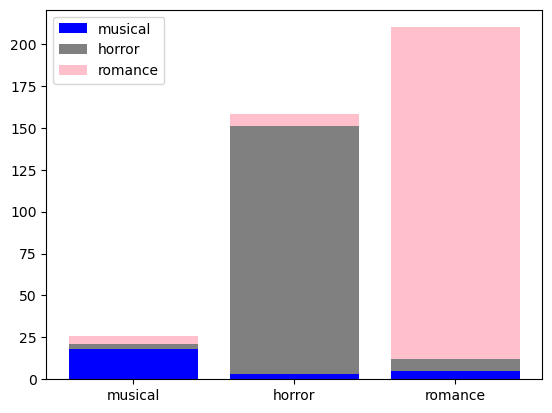

In [38]:
import matplotlib.pyplot as plt
import numpy as np
categories = ['musical', 'horror', 'romance']
values = np.array([[num_unique_musical, num_unique_int_hor_musical, num_unique_int_ro_musical],
                   [num_unique_int_hor_musical, num_unique_horror, num_unique_int_ro_hor],
                   [num_unique_int_ro_musical, num_unique_int_ro_hor, num_unique_romance]])

fig, ax = plt.subplots()
colors = ['blue', 'gray', 'pink']
for i in range(values.shape[0]):
    bars = ax.bar(categories, values[i], bottom=np.sum(values[:i], axis=0), label=categories[i], color=colors[i])
ax.legend(labels=categories)

plt.show()

In [ ]:
response = requests.get(romance_url).text
bs = BeautifulSoup(response)


In [17]:
b = bs.findAll('table')[1].findAll('p')
for i in range(len(b)):
    title = b[i].a.text
    romance.add(title)

In [18]:
len(romance)

210

__(b)__ We are interested in the genres `'Musical'`, `'Horror'`, and `'Romance'`. Craft a barplot displaying the absolute counts for each of these categories. In each bar, color-code the fractions of movies that are also counted in another genres. 

__(c, i)__ Using only regex, write a function `tokenizer` that returns bigrams of all non-whitespace and non-punctuation characters, according to the test case below: 

```python
test = '''
    Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, 
    consectetur, adipisci velit, sed quia non numquam eius modi tempora 
    incidunt ut labore et dolore magnam aliquam quaerat voluptatem.
'''
tokenizer(test)
>>> ['neque porro',
 'porro quisquam',
 'quisquam est',
 'qui dolorem',
 'dolorem ipsum',
 'ipsum quia',
 'quia dolor',
 'dolor sit',
 'sit amet',
 'adipisci velit',
 'sed quia',
 'quia non',
 'non numquam',
 'numquam eius',
 'eius modi',
 'modi tempora',
 'incidunt ut',
 'ut labore',
 'labore et',
 'et dolore',
 'dolore magnam',
 'magnam aliquam',
 'aliquam quaerat',
 'quaerat voluptatem']
 ```

__(ii)__ Use the tokenizer to obtain a tf-idf vector for each movie. Perform a (non-centered) principal component analysis (`sklearn.decomposition.TruncatedSVD`). _What fraction of variation is explained by the first principal component?_ __(iii)__ Generate a strip-plot for the first principal components versus all three genres. Does visualization indicate that a good classification could result from this approach? 